In [445]:
import numpy as np
import scipy as sp
import os

In [446]:
target_round_1 = 10
target_round_2 = 10
c = 0.00001

In [447]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/deterministic_rand_test/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    kd_wt = 1 #* np.e #** 2
    ground_truth = ground_truth/kd_wt
    round_1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/sequence_effects.csv", delimiter=",")
    round_2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/sequence_effects.csv", delimiter=",")

    #get unique sequences
    round_1_seqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/unique_sequences.csv", delimiter=",")
    round_2_seqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/unique_sequences.csv", delimiter=",")

    # get initial frequencies
    round_1_freqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/counts.csv", delimiter=",")
    round_2_freqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/counts.csv", delimiter=",")

    # get the selected frequencies
    round_1_selected = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/counts.csv", delimiter=",")
    round_2_selected = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/counts.csv", delimiter=",")

    return round_1, round_2, round_1_freqs, round_2_freqs, round_1_selected, round_2_selected, ground_truth, round_1_seqs, round_2_seqs


In [448]:
round_1, round_2, round_1_freqs, round_2_freqs, round_1_selected, round_2_selected, ground_truth, round_1_seqs, round_2_seqs = get_pool_data(target_round_1, target_round_2)

In [449]:
print(round_1.shape, round_2.shape, round_1_freqs.shape, round_2_freqs.shape, round_1_selected.shape, round_2_selected.shape, ground_truth.shape, round_1_seqs.shape, round_2_seqs.shape)

(1024,) (1024,) (1024,) (1024,) (1024,) (1024,) (15,) (1024, 5) (1024, 5)


In [450]:
B_round_1 = target_round_1 - np.sum(round_1_selected)
B_round_2 = target_round_2 - np.sum(round_2_selected)
print(B_round_1, B_round_2)

9.263661 9.847168


In [451]:
# K = (B/P_selected) - B
p_selected_round_1 = round_1_selected/round_1_freqs
p_selected_round_2 = round_2_selected/round_2_freqs

In [452]:
K_sequences_round_1 = (B_round_1/p_selected_round_1) - B_round_1
K_sequences_round_2 = (B_round_2/p_selected_round_2) - B_round_2

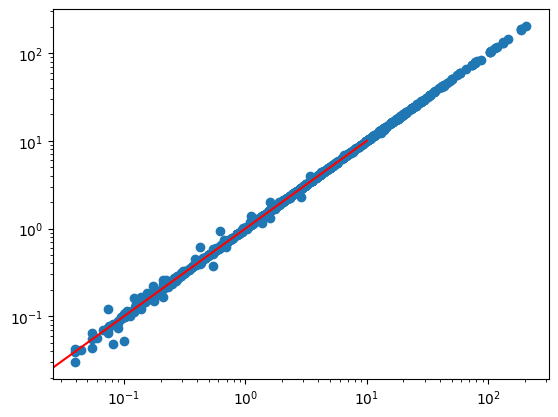

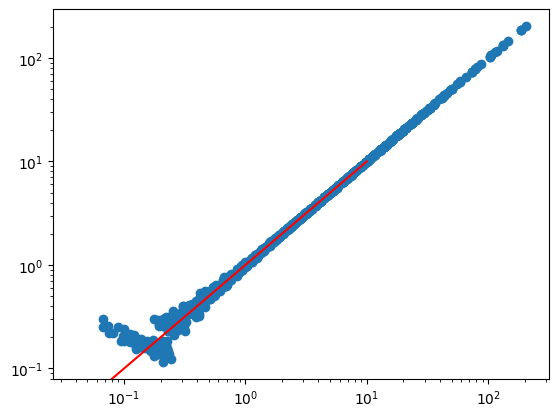

In [453]:
# plot round_1 vs K_sequences_round_1
import matplotlib.pyplot as plt
plt.scatter(round_1, K_sequences_round_1)
#add 1-to-1 line
plt.plot([0, 10], [0, 10], color='red')
#log scale both axes
plt.xscale('log')
plt.yscale('log')
plt.show()

# plot round_2 vs K_sequences_round_2
plt.scatter(round_2, K_sequences_round_2)
#add 1-to-1 line
plt.plot([0, 10], [0, 10], color='red')
#log scale both axes
plt.xscale('log')
plt.yscale('log')
plt.show()

In [454]:
# get indices where K_sequences_round_1 is not close to round_1
indices = np.where(np.abs(K_sequences_round_1 - round_1) > 0.1)
print(indices)

(array([  7,  39,  95, 127, 128, 137, 167, 233, 270, 276, 300, 341, 515,
       516, 519, 535, 543, 550, 551, 559, 567, 571, 575, 580, 583, 591,
       604, 607, 615, 623, 627, 631, 669, 675, 676, 679, 686, 687, 695,
       711, 713, 724, 731, 732, 734, 737, 743, 751, 759, 788, 794, 807,
       823, 831, 845, 853, 879, 887, 958, 975]),)


(array([29.,  9.,  7.,  2.,  0.,  5.,  2.,  1.,  2.,  3.]),
 array([1.0000e-06, 1.7840e-04, 3.5580e-04, 5.3320e-04, 7.1060e-04,
        8.8800e-04, 1.0654e-03, 1.2428e-03, 1.4202e-03, 1.5976e-03,
        1.7750e-03]),
 <BarContainer object of 10 artists>)

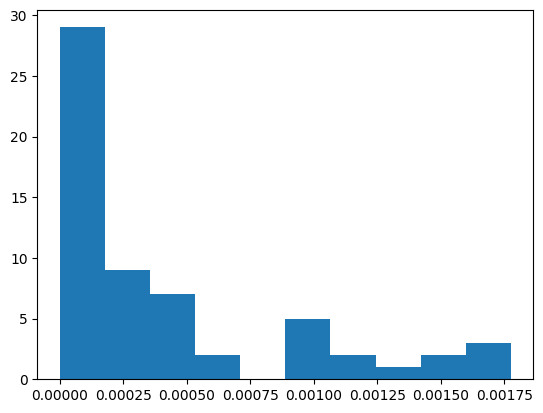

In [455]:
# plot histogram initial frequencies of sequences that are not close to K_sequences_round_1
plt.hist(round_1_freqs[indices])

(array([11., 17.,  5.,  6., 10.,  5.,  3.,  1.,  1.,  1.]),
 array([1.000e-06, 1.990e-05, 3.880e-05, 5.770e-05, 7.660e-05, 9.550e-05,
        1.144e-04, 1.333e-04, 1.522e-04, 1.711e-04, 1.900e-04]),
 <BarContainer object of 10 artists>)

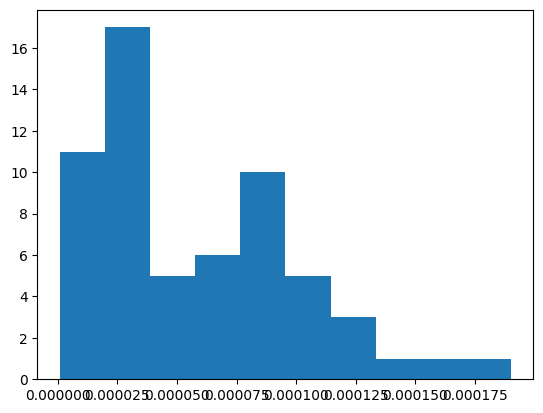

In [456]:
# plot histogram selected frequencies of sequences that are not close to K_sequences_round_1
plt.hist(round_1_selected[indices])

In [457]:
# get indices where selected and not selected sequences are > c
indices_r1 = np.where((round_1_selected > c) & (round_1_freqs - round_1_selected > c))

Value needs to be thresholded to remove sequences that have a very low initial frequencies. these sequences cannot be selected appropriately and there give wrong probability of binding! Threshold value is somewhat aritrary.

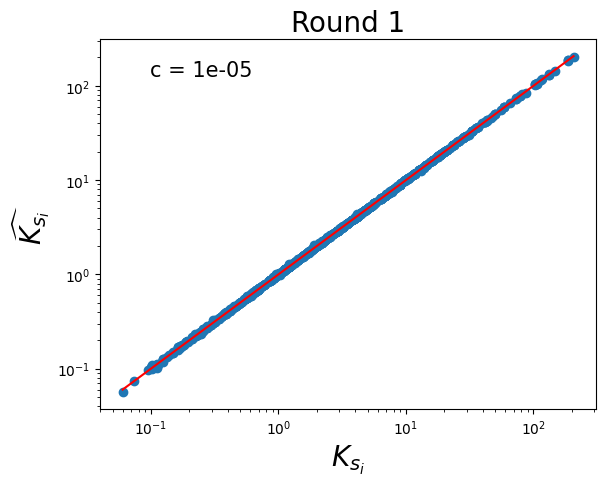

In [458]:
# plot k_sequences_round_1 vs round_1 for sequences with initial frequencies larger than 0.0001
plt.scatter(round_1[indices_r1], K_sequences_round_1[indices_r1])
#add 1-to-1 line
plt.plot([np.min(round_1[indices_r1]), np.max(round_1[indices_r1])], [np.min(round_1[indices_r1]), np.max(round_1[indices_r1])], color='red')
#log scale both axes
plt.xscale('log')
plt.xlabel('$K_{s_i}$', fontsize=20)
plt.yscale('log')
plt.ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# add text with c top left corner
plt.text(0.1, 0.9, f"c = {c}", fontsize=15, transform=plt.gca().transAxes)
plt.title('Round 1', fontsize=20)
plt.show()

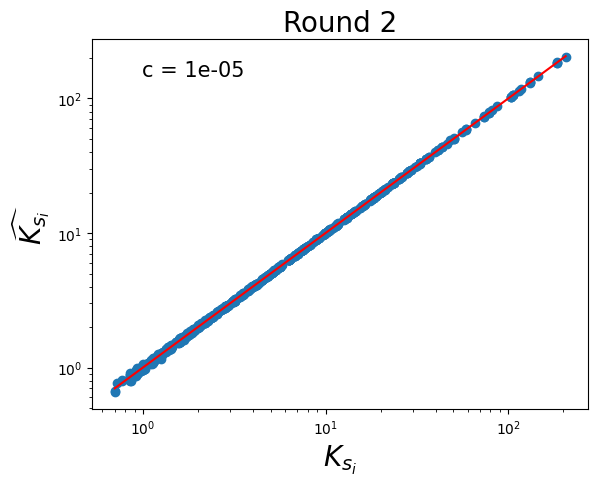

In [459]:
# same for round_2
indices_r2 = np.where((round_2_selected > c) & (round_2_freqs - round_2_selected > c))

plt.scatter(round_2[indices_r2], K_sequences_round_2[indices_r2])
#add 1-to-1 line
plt.plot([np.min(round_2[indices_r2]), np.max(round_2[indices_r2])], [np.min(round_2[indices_r2]), np.max(round_2[indices_r2])], color='red')
#log scale both axes
plt.xscale('log')
plt.xlabel('$K_{s_i}$', fontsize=20)
plt.yscale('log')
plt.ylabel('$\widehat{K_{s_i}}$', fontsize=20)
# add text with c top left corner
plt.text(0.1, 0.9, f"c = {c}", fontsize=15, transform=plt.gca().transAxes)
plt.title('Round 2', fontsize=20)
plt.show()

In [460]:
# convert unique sequences to one-hot encoding (4 states)
def one_hot_encoding(sequences):
    one_hot = np.zeros((sequences.shape[0], sequences.shape[1]*3))
    for i, seq in enumerate(sequences):
        for j, base in enumerate(seq):
            if base == 0:
                continue
            elif base == 1:
                one_hot[i, j*3] = 1
            elif base == 2:
                one_hot[i, j*3+1] = 1
            elif base == 3:
                one_hot[i, j*3+2] = 1
    return one_hot

In [461]:
# get one-hot encoding of sequences
one_hot_round_1 = one_hot_encoding(round_1_seqs)
one_hot_round_2 = one_hot_encoding(round_2_seqs)

print(round_1_seqs[0:5])
print(one_hot_round_1[0:5])
print(round_2_seqs[0:5])
print(one_hot_round_2[0:5])

[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [462]:
print(round_1_seqs[400:405])
print(one_hot_round_1[400:405])
print(round_2_seqs[400:405])
print(one_hot_round_2[400:405])

[[0. 0. 1. 2. 1.]
 [0. 1. 1. 2. 1.]
 [0. 2. 1. 2. 1.]
 [0. 3. 1. 2. 1.]
 [1. 0. 1. 2. 1.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]]
[[0. 0. 1. 2. 1.]
 [0. 1. 1. 2. 1.]
 [0. 2. 1. 2. 1.]
 [0. 3. 1. 2. 1.]
 [1. 0. 1. 2. 1.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]]


In [463]:
print(one_hot_round_1.shape, one_hot_round_2.shape)

(1024, 15) (1024, 15)


In [464]:
# subset at indices_r1 and indices_r2
one_hot_round_1_pruned = one_hot_round_1[indices_r1]
one_hot_round_2_pruned = one_hot_round_2[indices_r2]

print(one_hot_round_1_pruned.shape, one_hot_round_2_pruned.shape)

(930, 15) (713, 15)


In [465]:
# log transform the K_sequences_round_1 and K_sequences_round_2
K_sequences_round_1_log = np.log(K_sequences_round_1[indices_r1])
K_sequences_round_2_log = np.log(K_sequences_round_2[indices_r2])

print(K_sequences_round_1_log.shape, K_sequences_round_2_log.shape)

(930,) (713,)


In [466]:
# define optimization function: minimize the difference between the predicted and the actual K
def optimize_K(one_hot_sequences, K_sequences):
    # define the optimization function
    def f(x):
        return np.sum((np.dot(one_hot_sequences, x) - K_sequences)**2)

    # define the initial guess
    x0 = np.zeros(one_hot_sequences.shape[1])

    # optimize
    res = sp.optimize.minimize(f, x0)
    return res

res_round_1 = optimize_K(one_hot_round_1_pruned, K_sequences_round_1_log)
res_round_2 = optimize_K(one_hot_round_2_pruned, K_sequences_round_2_log)

In [467]:
#print the results
print(res_round_1)
print(res_round_2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.10927625548584996
        x: [ 1.997e+00 -7.988e-01 ...  1.500e+00  1.918e-01]
      nit: 23
      jac: [-9.313e-10  1.583e-08 ...  1.304e-08  1.024e-08]
 hess_inv: [[ 3.599e-03  1.572e-03 ... -4.860e-04 -4.510e-04]
            [ 1.572e-03  4.171e-03 ... -5.585e-04 -5.384e-04]
            ...
            [-4.860e-04 -5.585e-04 ...  3.590e-03  1.575e-03]
            [-4.510e-04 -5.384e-04 ...  1.575e-03  3.628e-03]]
     nfev: 592
     njev: 37
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.1565959347288025
        x: [ 1.997e+00 -8.010e-01 ...  1.501e+00  1.911e-01]
      nit: 21
      jac: [ 1.676e-07 -6.147e-08 ...  1.317e-06  1.417e-06]
 hess_inv: [[ 4.824e-03  2.367e-03 ... -3.109e-04 -9.034e-04]
            [ 2.367e-03  8.378e-03 ... -1.372e-03 -7.297e-04]
            ...
            [-3.109e-04 -1.372e-03 ...  4.282e-03  2.116e-03]
            [-9

In [468]:
# get resulting x values
x_round_1 = res_round_1.x
x_round_2 = res_round_2.x

print(x_round_1)
print(x_round_2)

[ 1.99664450e+00 -7.98760267e-01  1.41055373e+00 -6.15919127e-01
  5.62841607e-04  1.72759359e+00  1.81145121e-04 -7.94306108e-05
  1.03021448e-01 -3.42075944e-01 -8.66618015e-01 -5.61412327e-01
 -9.41331968e-01  1.49962274e+00  1.91839373e-01]
[ 1.99684816e+00 -8.00982030e-01  1.40973359e+00 -6.16490050e-01
  1.59936924e-03  1.72873021e+00 -7.24492887e-04 -3.37589928e-04
  1.03176750e-01 -3.44421052e-01 -8.66684734e-01 -5.60758600e-01
 -9.40094285e-01  1.50090267e+00  1.91059219e-01]


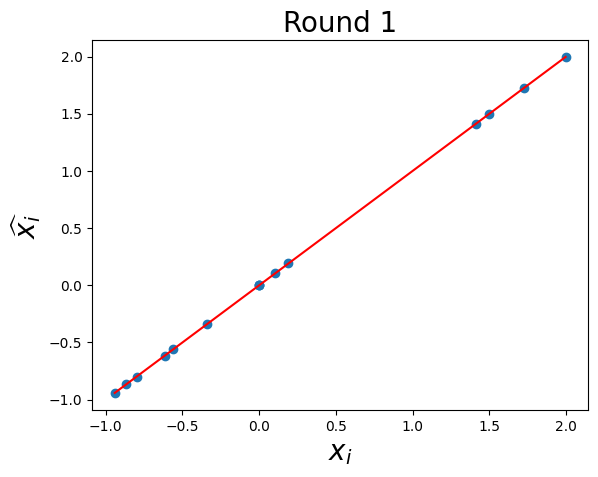

In [469]:
# plot x values vs ground truth
plt.scatter(np.log(ground_truth), x_round_1)
#add 1-to-1 line
plt.plot([np.min(np.log(ground_truth)), np.max(np.log(ground_truth))], [np.min(np.log(ground_truth)), np.max(np.log(ground_truth))], color='red')
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$\widehat{x_i}$', fontsize=20)
plt.title('Round 1', fontsize=20)
plt.show()

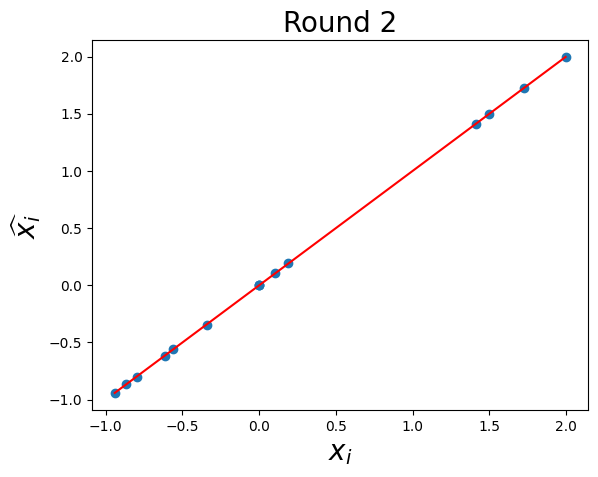

In [470]:
# same for round_2
plt.scatter(np.log(ground_truth), x_round_2)
#add 1-to-1 line
plt.plot([np.min(np.log(ground_truth)), np.max(np.log(ground_truth))], [np.min(np.log(ground_truth)), np.max(np.log(ground_truth))], color='red')
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$\widehat{x_i}$', fontsize=20)
plt.title('Round 2', fontsize=20)
plt.show()